#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [ ]:
import matplotlib
import numpy as np
import time

In [ ]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

# 1. Implementacja (klasa)

In [ ]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity
    self.n_of_items = len(self.weights)
    self.empty_array = np.zeros(self.n_of_items, dtype = np.int8)


  def solve_knapsack_brute_force(self):
    best_profit = 0
    best_pattern = self.empty_array

    # Going through all possible patterns
    for i in range(2**self.n_of_items):
      # Transforming format from '0b10' to [0, 0, 1, 0]
      pattern = bin(i)[2:].rjust(self.n_of_items, '0')
      pattern = [int(element) for element in list(pattern)]
      pattern = np.array(pattern)

      # print(sum(pattern * weights), sum(pattern * profits))
      current_weight = sum(pattern * self.weights)
      current_profit = sum(pattern * self.profits)

      if current_weight <= self.capacity and current_profit > best_profit:
        best_profit = current_profit
        best_pattern = pattern

    best_indexes = list(np.where(best_pattern == 1)[0])
    best_weight = sum(best_pattern * self.weights)
    return(best_indexes, best_profit, best_weight)


  def solve_knapsack_pw_ratio_till_miss(self):
    # Calculating profit/weight ratio
    pw_ratio = self.profits/self.weights
    # print(pw_ratio)

    current_weight, current_profit = 0, 0

    # Finding next item with best p/w ratio
    next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]
    # If the item fits, pack it, if not, quit packing
    while (current_weight + self.weights[next_item_index] <= self.capacity) and not np.array_equal(pw_ratio, self.empty_array):
      current_weight += self.weights[next_item_index]
      current_profit += self.profits[next_item_index]
      pw_ratio[next_item_index] = 0
      next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]

    best_indexes = list(np.where(pw_ratio == 0)[0])
    return(best_indexes, current_profit, current_weight)


  def solve_knapsack_pw_ratio_till_end(self):
    # Calculating profit/weight ratio
    pw_ratio = self.profits/self.weights
    # print(pw_ratio)

    current_weight, current_profit = 0, 0
    best_indexes = []

    # Finding next item with best p/w ratio
    next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]
    # If the item fits, pack it, if not, skip it and find the next one
    while (current_weight < self.capacity) and not np.array_equal(pw_ratio, self.empty_array):
      if (current_weight + self.weights[next_item_index] <= self.capacity):
        # print("wlozono:",next_item_index)
        current_weight += self.weights[next_item_index]
        current_profit += self.profits[next_item_index]
        best_indexes.append(next_item_index)
      pw_ratio[next_item_index] = 0
      next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]
      # print("potencjal", next_item_index)
      # print(current_weight + self.weights[next_item_index])

    return(sorted(best_indexes), current_profit, current_weight)


  def print_outcome(self, packed_items_indexes):
    total_profit, total_weight = 0, 0
    profit_process, weight_process = "p = ", "w = "
    for item_index in range(self.n_of_items):
      if item_index in packed_items_indexes:
        profit_process += str(self.profits[item_index]) + " + "
        total_profit += self.profits[item_index]
        weight_process += str(self.weights[item_index]) + " + "
        total_weight += self.weights[item_index]
    profit_process += "= " + str(total_profit)
    weight_process += "= " + str(total_weight)
    print("i =", packed_items_indexes)
    print("p/w =", np.around(self.profits/self.weights, 2))
    print(profit_process)
    print(weight_process)
    print("")


  def compare_sorting(self):
    brute = self.solve_knapsack_brute_force()
    pw_till_miss = self.solve_knapsack_pw_ratio_till_miss()
    pw_till_end = self.solve_knapsack_pw_ratio_till_end()

    print("p:", self.profits)
    print("w:", self.weights)
    print("")

    # print(brute, pw_till_miss, pw_till_end)
    for method, name in zip([brute, pw_till_miss, pw_till_end], ["Brute force", "P/W Heuristic till miss", "P/W Heuristic till end"]):
      print(name)
      self.print_outcome(method[0])

    return((brute, pw_till_miss, pw_till_end))




In [ ]:
knapsack = KnapSack(profits, weights, capacity)
knapsack.compare_sorting()

p: [16  8  9  6]
w: [8 3 5 2]

Brute force
i = [1, 2]
p/w = [2.   2.67 1.8  3.  ]
p = 8 + 9 + = 17
w = 3 + 5 + = 8

P/W Heuristic till miss
i = [1, 3]
p/w = [2.   2.67 1.8  3.  ]
p = 8 + 6 + = 14
w = 3 + 2 + = 5

P/W Heuristic till end
i = [1, 3]
p/w = [2.   2.67 1.8  3.  ]
p = 8 + 6 + = 14
w = 3 + 2 + = 5



(([1, 2], 17, 8), ([1, 3], 14, 5), ([1, 3], 14, 5))


# 2. Brute force - opis, roboczo

Sprawdzamy wszystkie możliwe kombinacje  
jak?  
przedmioty mają indeksy 1,2,3,4,...  
<br>
**met1**  
1, 2, 3, 4, 12, 13, 14, 23, 24, 34, 123, ...  
wypisujemy/myślimy jak to pętlami zaprogramować  
<br>
**met2**  
xxxx - reprezentuje 4 przedmioty  
0 - zostawienie przedmiotu, 1 - zabranie przedmiotu  
0000, 1000, 0101 - różne kombinacje wzięcia/nie wzięcia przedmiotów  
więc patrzymy na kolejne liczby binarnie  

0000, 0001, 0010,

In [ ]:
#4 przedm - > 4 bity
#liczby od 0 do 2^4-1

n_of_items = len(weights)
best_profit = 0
best_pattern = np.array([0,0,0,0])

# All possibilities
for i in range(2**n_of_items):
  pattern = bin(i)[2:].rjust(n_of_items, '0')
  pattern = [int(element) for element in list(pattern)]
  pattern = np.array(pattern)

  # print(sum(pattern * weights), sum(pattern * profits))
  current_weight = sum(pattern * weights)
  current_profit = sum(pattern * profits)

  if current_weight <= capacity and current_profit > best_profit:
    best_profit = current_profit
    best_pattern = pattern

print(best_profit, best_pattern)

17 [0 1 1 1 0]


# 3. Heurystyka - opis, roboczo



liczymy stosunek wartości/masy, i pakujemy najbardziej wartościowe (tym sposobem) przedmioty

Dopóki waga jest mniejsza od maksymalnej, dodawaj kolejne najbardziej opłacalne przedmioty  
a) jesli kolejny najbardziej wartościowy przedmiot się nie zmieści, zakończ pakowanie  
b) jesli kolejny najbardziej wartościowy przedmiot się nie zmieści, spróbuj spakować kolejny


In [ ]:

n_of_items = len(weights)

# profit/weight ratio
pw_ratio = profits/weights
empty_array = np.array([0,0,0,0])


current_weight = 0
current_profit = 0

next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]
while (current_weight + weights[next_item_index] < capacity) and not np.array_equal(pw_ratio, empty_array):
  current_weight += weights[next_item_index]
  current_profit += profits[next_item_index]
  pw_ratio[next_item_index] = 0
  next_item_index = np.where(pw_ratio == max(pw_ratio))[0][0]

current_profit
print(current_weight, current_profit, pw_ratio)


7 16 [0.  0.  1.  0.  0.2]


# 4. Wykresy

In [ ]:
import matplotlib.pyplot as plt
from random import sample

def create_items_data(range_start, range_stop):
  data = {}
  nrs_of_items = [i for i in range(range_start, range_stop)]
  for n_of_items in nrs_of_items:
    profits = np.array(sample(range(1,range_stop*2), k=n_of_items))
    weights = np.array(sample(range(1,range_stop*2), k=n_of_items))
    data[n_of_items] = (profits, weights)
  return data, nrs_of_items


def analyse_method(data, nrs_of_items, method, custom_capacity=None):
  times, results = [], []
  # print(data)
  # Saving times and results of method for different numbers of items
  for n_of_items in nrs_of_items:
    profits, weights = data[n_of_items]
    if not custom_capacity:
      capacity = sum(profits)/2 #JAKA POWINNA BYC CAPACITY?
    else:
      capacity = custom_capacity
    knapsack = KnapSack(profits, weights, capacity)
    if method == "brute_force":
      start = time.process_time()
      result = knapsack.solve_knapsack_brute_force()
      stop = time.process_time()
    elif method == "pw_ratio":
      start = time.process_time()
      result = knapsack.solve_knapsack_pw_ratio_till_end()
      stop = time.process_time()
    else:
      start, stop = 0,0
      result = ([],0,0)

    times.append(stop-start)
    results.append(result)

  return times, results


def make_plot_from_data(nrs_of_items, times, method):
  fig, ax = plt.subplots()
  x = nrs_of_items
  y = times

  ax.plot(x, y, linewidth=2.0)
  ax.set(xticks=nrs_of_items)
  title = method + " method"
  plt.title(title)
  plt.xlabel('Number of items')
  plt.ylabel('Time [s]')

  # plt.savefig(f'{name}_plot.png')
  plt.show()


Prosty wykres dla metody Brute Force  
Widzimy, że czas rośnie wykładniczo w zależności od liczby przedmiotów (~2^n)

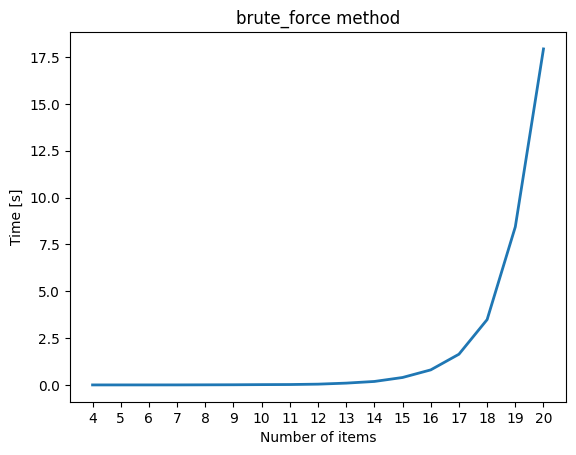

In [ ]:
data, nrs_of_items = create_items_data(4, 21)
times, results = analyse_method(data, nrs_of_items, "brute_force")
make_plot_from_data(nrs_of_items, times, "brute_force")

In [ ]:
def make_comparing_plot(nrs_of_items, results1, method1_name, results2, method2_name, figure_title, y_axis_label):
  fig, ax = plt.subplots()
  x = nrs_of_items
  y = results1
  ax.plot(x, y, linewidth=2.0, label=method1_name)
  y = results2
  ax.plot(x, y, linewidth=2.0, label=method2_name)
  ax.set(xticks=nrs_of_items)
  title = figure_title
  plt.title(title)
  plt.xlabel('Number of items')
  plt.ylabel(y_axis_label)
  plt.legend(loc='lower right')

  # plt.savefig(f'{name}_plot.png')
  plt.show()


# dla tych samych danych porownywac czy ratio robi poprawnie czy nie
def compare_methods(range_start, range_stop, capacity=None):
  data, nrs_of_items = create_items_data(range_start, range_stop)

  times_brute, results_brute = analyse_method(data, nrs_of_items, "brute_force", capacity)
  times_pw_ratio, results_pw_ratio = analyse_method(data, nrs_of_items, "pw_ratio", capacity)

  make_plot_from_data(nrs_of_items, times_brute, "brute_force")
  make_plot_from_data(nrs_of_items, times_pw_ratio, "pw_ratio")

  print("\nResults brute force:\n",results_brute)
  profits_brute = [result[1] for result in results_brute]
  print("Results pw_ratio:\n",results_pw_ratio,"\n")
  profits_pw_ratio = [result[1] for result in results_pw_ratio]
  make_comparing_plot(nrs_of_items, times_brute, "time_brute_force", times_pw_ratio, "time_pw_ratio", "Result times for different methods", "Time [s]")
  make_comparing_plot(nrs_of_items, profits_brute, "brute_force", profits_pw_ratio, "pw_ratio", "Profit differences counted by different methods", "Profit")

  profits_brute = np.array(profits_brute)
  profits_pw_ratio = np.array(profits_pw_ratio)
  diff = profits_brute - profits_pw_ratio
  print("\nDifference has occured", len(np.where(diff != 0)[0]), "times")


Porównanie z metodą heurystyczną profit/weight ratio  
Używając metody heurystycznej, otrzymujemy wyniki dużo szybciej (dla 20 przedmiotów - 70tys razy szybciej), czas rośnie liniowo.  
Dla wygenerownych przykładów rozwiązania nie różnią się tak bardzo, w większości przypadków metoda heurystyczna daje takie same rozwiązania jak metoda brutalna. Czasami występują odchylenia (dla 17 pomiarów, wystąpiły 6 razy), ale nie są duże - profity otrzymane metodą brute force są nieznacznie lepsze.  
Wnioski - heurystyka działa dosyć dobrze, szczególnie biorąc pod uwagę czasy użycia obu metod.

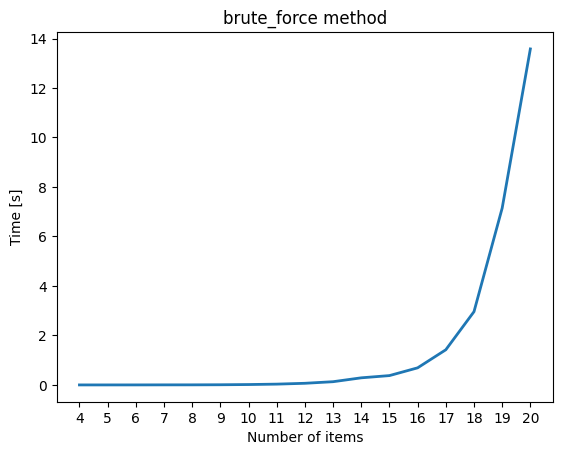

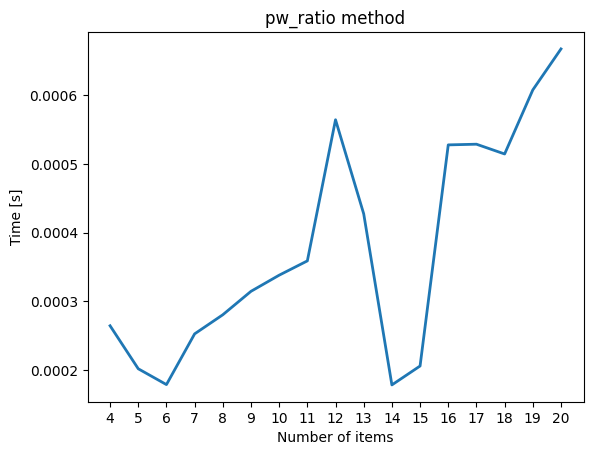


Results brute force:
 [([1, 3], 69, 50), ([0, 2, 3], 68, 46), ([0, 1, 2, 3, 5], 150, 50), ([0, 1, 4], 95, 22), ([1, 2, 4, 6], 102, 47), ([0, 3, 4, 5], 66, 44), ([0, 2, 3, 7], 96, 50), ([4, 7, 9], 58, 50), ([4, 9, 11], 88, 48), ([1, 3, 5, 6, 11, 12], 136, 49), ([2, 3, 7, 8, 10], 99, 50), ([1, 4, 8, 10, 12], 150, 50), ([1, 2, 4, 8, 9, 13], 151, 46), ([7, 11, 12, 13, 14], 152, 50), ([1, 2, 8, 10, 16], 170, 48), ([4, 7, 9, 17], 123, 50), ([1, 4, 6, 8, 14, 17, 19], 216, 50)]
Results pw_ratio:
 [([0, 1, 2], 46, 41), ([0, 2, 3], 68, 46), ([0, 1, 2, 3, 5], 150, 50), ([0, 1, 4], 95, 22), ([1, 2, 4, 6], 102, 47), ([0, 3, 4, 5], 66, 44), ([0, 2, 3, 6, 8], 70, 35), ([0, 4, 7, 10], 54, 44), ([4, 9, 11], 88, 48), ([1, 3, 5, 6, 11, 12], 136, 49), ([2, 3, 7, 8, 10], 99, 50), ([1, 4, 8, 10, 12], 150, 50), ([1, 2, 4, 8, 9, 13], 151, 46), ([0, 2, 7, 12, 13, 14], 142, 50), ([1, 2, 8, 10, 16], 170, 48), ([7, 9, 16, 17], 109, 43), ([1, 4, 6, 10, 14, 17, 18], 211, 49)] 



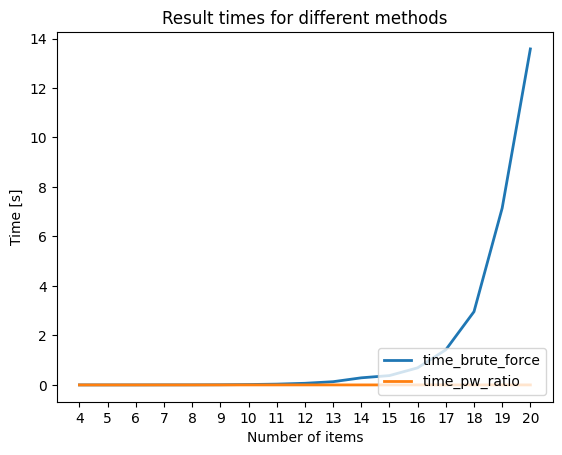

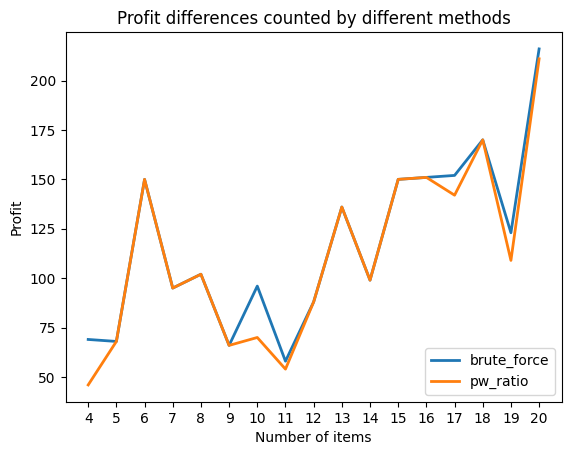


Difference has occured 6 times


In [ ]:
compare_methods(4,21, 50)

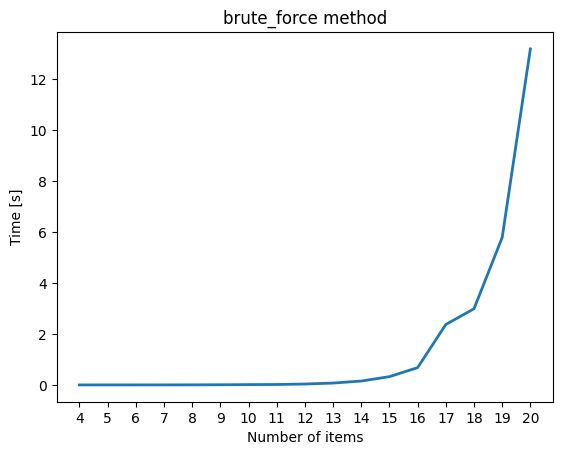

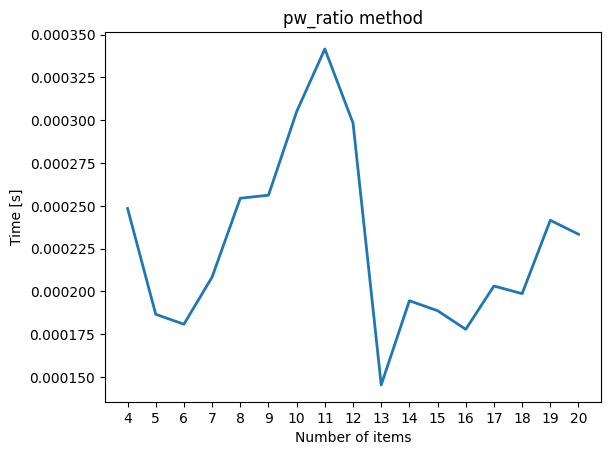


Results brute force:
 [([0], 18, 15), ([0, 1, 3, 4], 76, 44), ([3], 29, 39), ([0, 4, 6], 113, 69), ([0, 1, 2, 4, 7], 144, 76), ([0, 2, 3, 4, 7], 141, 90), ([1, 2, 3, 6, 7, 9], 155, 96), ([1, 2, 3, 4, 6, 8], 167, 115), ([0, 1, 5, 6, 9, 10], 170, 109), ([0, 1, 2, 8, 10, 11], 138, 118), ([1, 2, 4, 5, 6, 8, 9, 10, 11, 13], 227, 147), ([1, 3, 5, 6, 7, 13, 14], 157, 124), ([1, 3, 4, 5, 8, 12, 13, 14, 15], 263, 159), ([1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 15], 313, 178), ([1, 2, 3, 5, 6, 10, 11, 12, 13, 16], 264, 179), ([1, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18], 281, 178), ([0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 18], 339, 196)]
Results pw_ratio:
 [([0], 18, 15), ([0, 1, 3, 4], 76, 44), ([1, 4, 5], 23, 33), ([0, 3, 4, 5], 107, 73), ([0, 1, 3, 4, 6, 7], 138, 83), ([0, 2, 3, 4, 7], 141, 90), ([1, 2, 3, 4, 6], 155, 88), ([1, 2, 3, 4, 5, 8, 10], 156, 106), ([0, 1, 4, 5, 6, 8, 9], 170, 110), ([0, 1, 2, 8, 10, 11], 138, 118), ([1, 2, 4, 5, 6, 8, 9, 10, 11, 13], 227, 147), ([1, 3, 5, 6, 7, 13, 14],

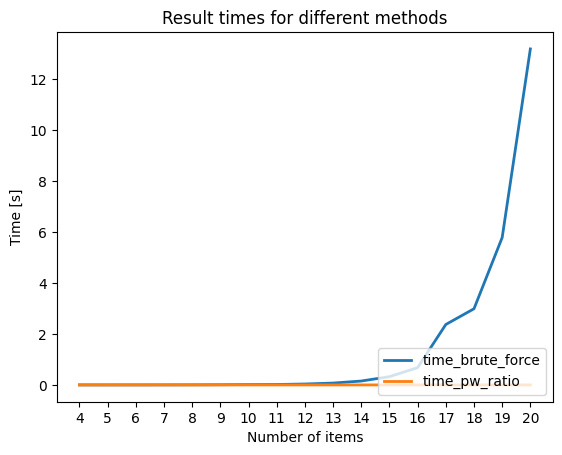

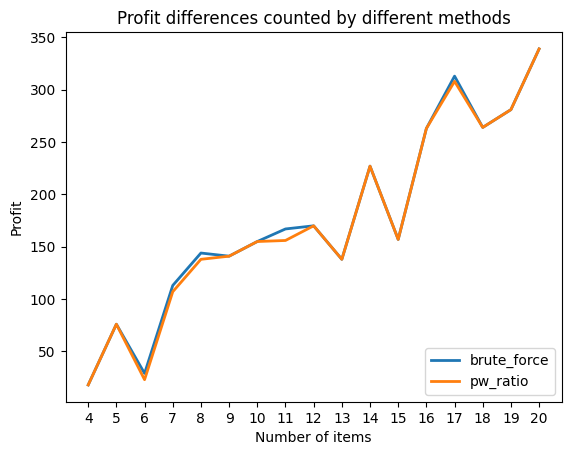


Difference has occured 5 times


In [ ]:
compare_methods(4,21)